# NETFLIX DATASET EXPLORATORY DATA ANALYSIS PROJECT
  ## Table of contents
### 1. [Introduction](#introduction)
### 2. [Load Packages](#paragraph1)
### 3. [Observation Of Dataset](#paragraph2)
### 4. [Exploratory Data Analysis](#paragraph3)
 #####   i. [Country Analysis](#subparagraph1)<br>
#####   ii. [Release Year Analysis](#subparagraph2)<br>
#####   iii. [Director Analysis](#subparagraph3)<br>
#####   iv. [Actor Analysis](#subparagraph4)<br>
#####   v. [Genre Analysis](#subparagraph5)<br>
##### vi. [Description Analysis](#subparagraph6)<br>
### 5.[Conclusion](#paragraph4)

## <u>INTRODUCTION</u> <a name="introduction"></a> <br>
This is an exploratory data analysis project which has been conducted on a netflix dataset that has been sourced from kaggle.
In this Project, we will take a look at the dataset and use python packages to extract insight on the data

## <u>Loading The Packages</u> <a name="paragraph1"></a> <br>

In [68]:
#Load the Exploratory data pakages
import pandas as pd
import numpy as np
from collections import Counter
import keyword
from textblob import TextBlob

In [2]:
#load Data Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Load Text Cleaning pkgs
import neattext.functions as nfx

In [5]:
#Load Dataset 
netfx = pd.read_csv(r"C:\Users\USER\Documents\netflix_titles.csv\netflix_titles.csv") 

## <u>OBSERVATION OF DATASET</u><a name="paragraph2"></a>

In [6]:
#Preview of the Dataset
display(netfx.head(11))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
#To check for a specific record
netfx[netfx['title'].isin(['The Starling'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [8]:
#Shape of the dataset
netfx.shape

(8807, 12)

**OBSERVATION**<br>
+ 12 Columns
+ 8807 Rows/Records

In [9]:
#Check the datatypes
netfx.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
#Checking the specifications of the dataset
netfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
#Summary of the dataset
netfx.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
#Check for Columns
netfx.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
len(netfx['country'].value_counts())

748

In [14]:
len(netfx['type'].unique().tolist())

2

## <u>Exploratory Data Analysis</u><a name="paragraph3"></a> <br>

### <u>Country Analysis</u><a name="subparagraph1"></a><br>

In [15]:
#We will add a string on null values on country column
netfx['country']=netfx['country'].fillna('No Country')

In [16]:
#Dataframe that separates all countries that have more than one counrty represented on a movie. 
CLCountry = pd.DataFrame()
CLCountry = netfx['country'].str.split(',',expand=True).stack()
#Lets put it into a frame
CLCountry = CLCountry.to_frame()
#Give Column Name
CLCountry.columns = ['Country CLN']
#The Dataframe
CLCountry

,,Country CLN
0,0,United States
1,0,South Africa
2,0,No Country
3,0,No Country
4,0,India
...,...,...
8802,0,United States
8803,0,No Country
8804,0,United States
8805,0,United States


In [17]:

CLCountry

,,Country CLN
0,0,United States
1,0,South Africa
2,0,No Country
3,0,No Country
4,0,India
...,...,...
8802,0,United States
8803,0,No Country
8804,0,United States
8805,0,United States


In [18]:
#Creating the Dataframe Country_N that has the total number of titles produced
Country_N = CLCountry.groupby(['Country CLN']).size().reset_index(name = 'Titles Produced')
#Removing Null(str) values
Country_N  = Country_N [Country_N['Country CLN'] !='No Country']

Country_N

,Country CLN,Titles Produced
0,,7
1,Afghanistan,1
2,Albania,1
3,Algeria,3
4,Angola,1
...,...,...
193,Uruguay,9
194,Venezuela,2
195,Vietnam,7
196,West Germany,1


In [19]:
Country_N.nlargest(10,'Titles Produced')

,Country CLN,Titles Produced
192,United States,3211
141,India,1008
191,United Kingdom,628
106,United States,479
122,Canada,271
148,Japan,259
132,France,212
180,South Korea,211
34,France,181
182,Spain,181


<Figure size 432x288 with 0 Axes>

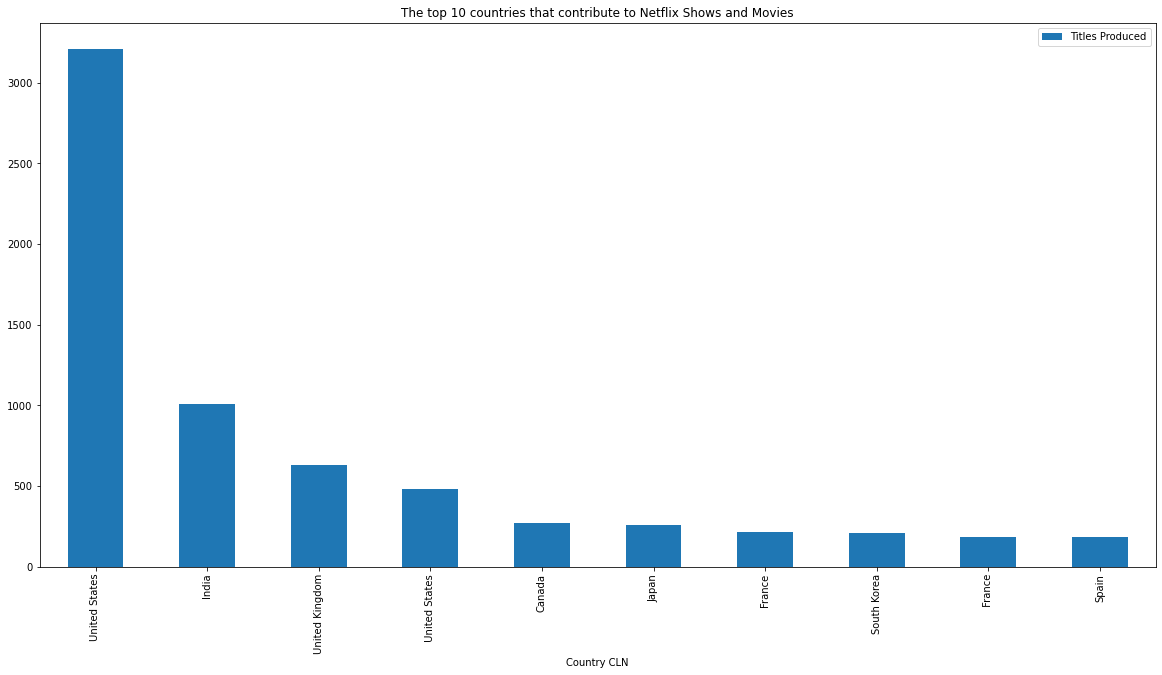

In [20]:
#Visualization
plt.figure()
Country_N.nlargest(10,'Titles Produced').plot(kind = 'bar',x='Country CLN',y='Titles Produced',figsize=(20,10))
plt.title('The top 10 countries that contribute to Netflix Shows and Movies')
plt.show()

### **OBSERVATION**<br>
It can be seen that:
+ United states seems to be leading with a huge margin compared to other countries on the movies and shows produced on Netflix.
+ India is **2nd** place. It is outstanding that it is less than half of the amount of movies/shows produced by United States of America
+ United kindom is **3rd** place. It is also less than half of the movies/shows presence on netflix than India.
+ Canada is at **4th** place with the rest of the countries having a small difference among them.

In [21]:
Country_N.nsmallest(15,'Titles Produced')

,Country CLN,Titles Produced
1,Afghanistan,1
2,Albania,1
4,Angola,1
6,Armenia,1
9,Azerbaijan,1
10,Bahamas,1
11,Bangladesh,1
13,Bermuda,1
14,Botswana,1
17,Burkina Faso,1


### **OBSERVATION**<br>
+ Afghanistan
+ Albania
+ Angola
+ Armenia
+ Azerbaijan
+ Cuba
These are few examples of the countries that produced least movies and shows on netflix

### <u>Release Year Analysis</u><a name="subparagraph2"></a><br>

In [22]:
#Create and Give Dataframe Column names pulled from master dataset
Release_Year_Clean= netfx[['release_year','type']]
#Renaming the columns
Release_Year_Clean=Release_Year_Clean.rename(columns={'release_year':'Release Year'})
Release_Year_Clean

,Release Year,type
0,2020,Movie
1,2021,TV Show
2,2021,TV Show
3,2021,TV Show
4,2021,TV Show
...,...,...
8802,2007,Movie
8803,2018,TV Show
8804,2009,Movie
8805,2006,Movie


In [23]:
#Adding the Total title column using size function
Release_Year_Clean=Release_Year_Clean.groupby(['Release Year','type']).size().reset_index(name='Total Titles')
#Checking all content released after 2010
Release_Year_Clean[Release_Year_Clean['Release Year']>=2010]

,Release Year,type,Total Titles
95,2010,Movie,154
96,2010,TV Show,40
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88


In [24]:
Release_Year_Clean[Release_Year_Clean['Release Year']>=2010].nlargest(10,'Total Titles')

,Release Year,type,Total Titles
109,2017,Movie,767
111,2018,Movie,767
107,2016,Movie,658
113,2019,Movie,633
115,2020,Movie,517
116,2020,TV Show,436
105,2015,Movie,398
114,2019,TV Show,397
112,2018,TV Show,380
118,2021,TV Show,315


In [25]:
#The Years where TV Show release was highest
Release_Year_Clean[Release_Year_Clean['type']=='TV Show'].nlargest(10,'Total Titles')

,Release Year,type,Total Titles
116,2020,TV Show,436
114,2019,TV Show,397
112,2018,TV Show,380
118,2021,TV Show,315
110,2017,TV Show,265
108,2016,TV Show,244
106,2015,TV Show,162
104,2014,TV Show,88
100,2012,TV Show,64
102,2013,TV Show,63


<Figure size 432x288 with 0 Axes>

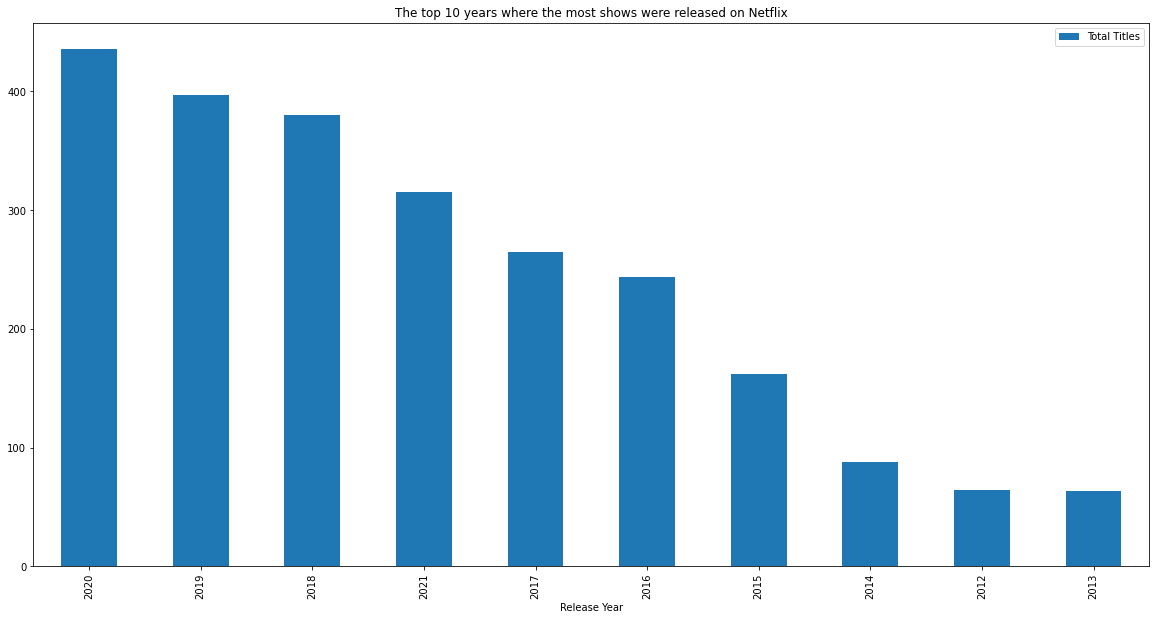

In [26]:
#Visualization
plt.figure()
Release_Year_Clean[Release_Year_Clean['type']=='TV Show'].nlargest(10,'Total Titles').plot(kind = 'bar',x='Release Year',y='Total Titles',figsize=(20,10))
plt.title('The top 10 years where the most shows were released on Netflix')
plt.show()

### **OBSERVATION**<br>
The following observations can be made with regards to the TV shows on Netflix:<br>
 + Most TV Shows present on Netflix were actually released in the year **2020**, approximately 436 TV shows either seasons 
 + The year 2019 had the **2nd** most amount of TV Shows at 397 TV Shows released that year.
 + 2018 comes in at **3rd** position with a small difference of 17, gence total being 380.
 + 2021 comes at **4th** Position

In [27]:
#The Years where TV Show release was lowest
Release_Year_Clean[Release_Year_Clean['type']=='TV Show'].nsmallest(11,'Total Titles')

,Release Year,type,Total Titles
0,1925,TV Show,1
5,1945,TV Show,1
7,1946,TV Show,1
18,1963,TV Show,1
23,1967,TV Show,1
29,1972,TV Show,1
32,1974,TV Show,1
36,1977,TV Show,1
39,1979,TV Show,1
42,1981,TV Show,1


### **OBSERVATION**<br>
From the query above, It is observed that:<br>
+ All years with lowest Release Rate have a common release value of 1 TV Show in each year.
+ Most years in this list range are in the 1900's. Most of them come before the year **2000**.
+ The Most ancient TV Show release year is **1925**. 

In [28]:
#The Years where TV Show release was highest
Release_Year_Clean[Release_Year_Clean['type']=='Movie'].nlargest(10,'Total Titles')

,Release Year,type,Total Titles
109,2017,Movie,767
111,2018,Movie,767
107,2016,Movie,658
113,2019,Movie,633
115,2020,Movie,517
105,2015,Movie,398
117,2021,Movie,277
103,2014,Movie,264
101,2013,Movie,225
99,2012,Movie,173


<Figure size 432x288 with 0 Axes>

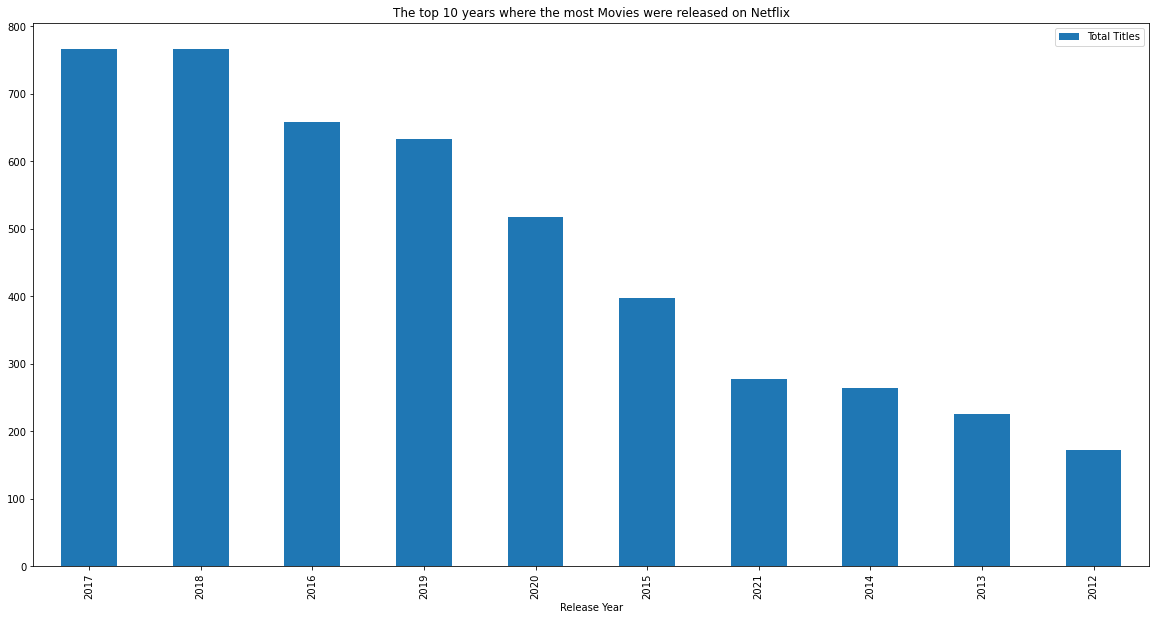

In [29]:
#Visualization
plt.figure()
Release_Year_Clean[Release_Year_Clean['type']=='Movie'].nlargest(10,'Total Titles').plot(kind = 'bar',x='Release Year',y='Total Titles',figsize=(20,10))
plt.title('The top 10 years where the most Movies were released on Netflix')
plt.show()

### **OBSERVATION**<br>
From the visualization above we can see:
+ **2017 and 2018** is the year where most movies on Netflix were released
+ 2016 was second with about 658 titles.
+ 2019 is **3rd** with 633 titles.

In [30]:
#The Years where TV Show release was lowest
Release_Year_Clean[Release_Year_Clean['type']=='Movie'].nsmallest(10,'Total Titles')

,Release Year,type,Total Titles
6,1946,Movie,1
8,1947,Movie,1
13,1959,Movie,1
15,1961,Movie,1
17,1963,Movie,1
21,1966,Movie,1
1,1942,Movie,2
9,1954,Movie,2
11,1956,Movie,2
19,1964,Movie,2


<AxesSubplot:xlabel='Release Year'>

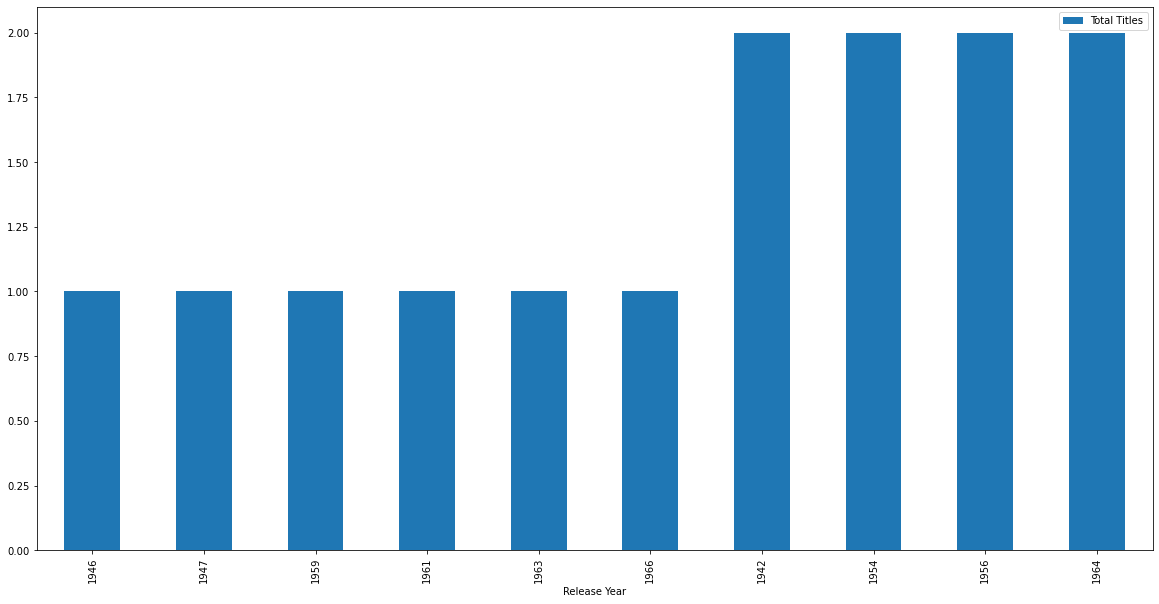

In [31]:
#The years with the lowest movie release
Release_Year_Clean[Release_Year_Clean['type']=='Movie'].nsmallest(10,'Total Titles').plot(kind='bar',x='Release Year',y='Total Titles',figsize=(20,10))

### **OBSERVATION**<br>
The Lowest Movies release rates on Netflix are movies that was released in the years:<br>
+ 1946
+ 1947
+ 1959
+ 1961<br>
They all have released 1 movie each year

In [32]:
#The Oldest Movies on Netflix
Release_Year_Clean[Release_Year_Clean['type']=='Movie'].nsmallest(5,'Release Year')

,Release Year,type,Total Titles
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
6,1946,Movie,1


### **OBSERVATION**<br>
The Oldest Movies on Netflix came from the year:<br>
**1942 - 1946**


In [33]:
netfx.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### <u>Director Analysis</u><a name="subparagraph3"></a><br>

In [34]:
#We will add a string on null values on directors column
netfx['director']=netfx['director'].fillna('No Director')

In [35]:
#Dataframe that separates all directors that have more than one director on a movie. 
Director_Clean = pd.DataFrame()
Director_Clean = netfx['director'].str.split(',',expand=True).stack()
#Lets put it into a frame
Director_Clean = Director_Clean.to_frame()
#Give Column Name
Director_Clean.columns = ['CLDirectors']
#The Dataframe
Director_Clean

,,CLDirectors
0,0,Kirsten Johnson
1,0,No Director
2,0,Julien Leclercq
3,0,No Director
4,0,No Director
...,...,...
8802,0,David Fincher
8803,0,No Director
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [36]:
#Creating the Dataframe Directors that has the total number of titles produced
directors = Director_Clean.groupby(['CLDirectors']).size().reset_index(name = 'Titles Produced')
#Removing Null(str) values
directors = directors[directors.CLDirectors !='No Director']
directors

,CLDirectors,Titles Produced
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [37]:
directors.nlargest(10,"Titles Produced")

,CLDirectors,Titles Produced
4021,Rajiv Chilaka,22
261,Jan Suter,18
4068,Raúl Campos,18
3235,Marcus Raboy,16
4652,Suhas Kadav,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12
5075,Youssef Chahine,12


In [38]:
#The directors that produced the most shows/videos
directors = directors.sort_values(by=['Titles Produced'], ascending=False)
directors.head()

,CLDirectors,Titles Produced
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3235,Marcus Raboy,16


<Figure size 432x288 with 0 Axes>

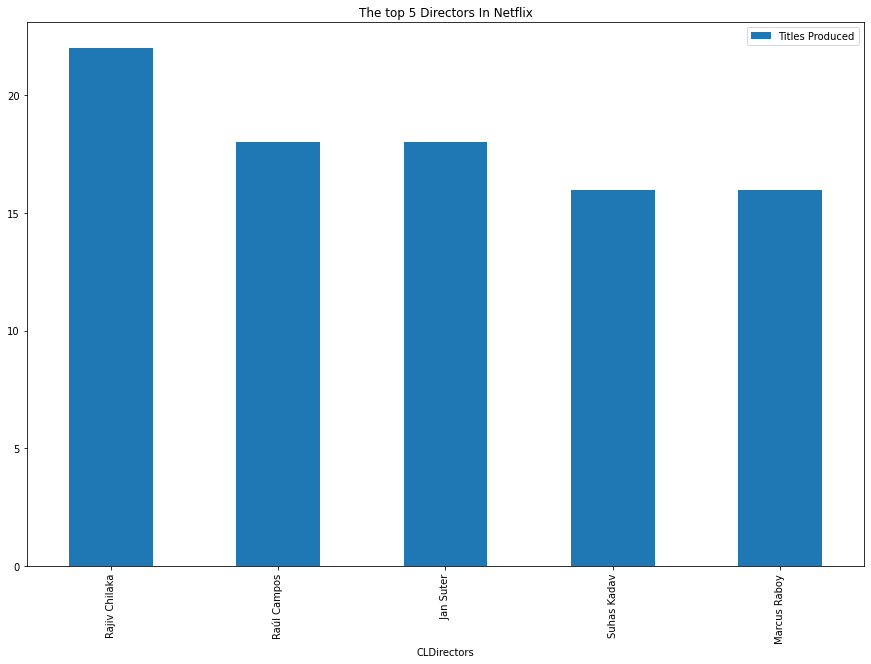

In [39]:
#Visualization
plt.figure()
directors.head().plot(kind='bar',x='CLDirectors',y='Titles Produced',figsize=(15,10))
plt.title("The top 5 Directors In Netflix")
plt.show()

**OBSERVATION**<br>
The following can be deduced:<br>
+ Rajiv Chilaka is the director who has the most movies and shows on Netflix.
##### Rajiv Chilaka is the co-founder and CEO of Hyderabad-based Green Gold Animations and the creator of a few cartoons including Krishna cartoon series and Chhota Bheem <br>
+ Raúl Campos, Jan Suter tie at number two

### <u>Actor Analysis</u><a name="subparagraph4"></a><br>

In [40]:
#We will add a string on null values on cast column
netfx['cast']=netfx['cast'].fillna('No Actor')

In [41]:
#Dataframe that separates all Actors that have more than one Actor on a movie. 
Actor_Clean = pd.DataFrame()
Actor_Clean = netfx['cast'].str.split(',',expand=True).stack()
#Lets put it into a frame
Actor_Clean = Actor_Clean.to_frame()
#Give Column Name
Actor_Clean.columns = ['Clean_Actors']
#The Dataframe
Actor_Clean

Clean_Actors
0    0                No Actor
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [42]:
#Creating the Dataframe Actors that has the total number of titles Acted
Actors = Actor_Clean.groupby(['Clean_Actors']).size().reset_index(name = 'Movies Casted')
#Removing Null(str) values
Actors = Actors[Actors.Clean_Actors !='No Actor']
#The dataFrame Actors
Actors

,Clean_Actors,Movies Casted
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1
...,...,...
39292,İbrahim Büyükak,1
39293,İbrahim Çelikkol,1
39294,Şahin Irmak,1
39295,Şükrü Özyıldız,1


In [43]:
Actors.nlargest(10,"Movies Casted")

,Clean_Actors,Movies Casted
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
25410,Rajesh Kava,26
38446,Shah Rukh Khan,26
1905,Andrea Libman,25
4186,Boman Irani,25
23956,Paresh Rawal,25


In [44]:
#The Actors that were casted on the mos number of shows on Netflix
Actors = Actors.sort_values(by=['Movies Casted'], ascending=False)
Actors.head()

,Clean_Actors,Movies Casted
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27


<Figure size 432x288 with 0 Axes>

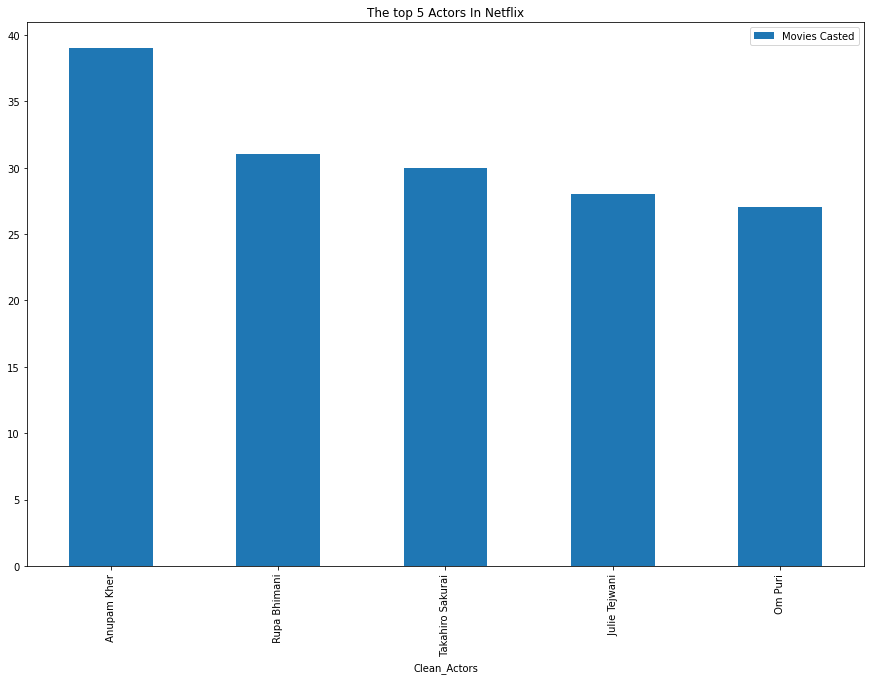

In [45]:
#Visualization
plt.figure()
Actors.head().plot(kind='bar',x='Clean_Actors',y='Movies Casted',figsize=(15,10))
plt.title("The top 5 Actors In Netflix")

plt.show()

**OBSERVATION**<br>
+ Anupam Kher,he has the **most number of movies on Netflix**, (born 7 March 1955) is an Indian actor and the former Chairman of Film and Television Institute of India. He has appeared in over 500 films predominantly in the Hindi language and many plays. 
+ Rupa Bhimani(**Second** Most Casted Actor) is an actor, known for Mahayoddha Rama, Chhota Bheem Kung Fu Dhamaka and Chhota Bheem in Junglee Kabila.
  + He has worked with *Rajiv Chilaka* who is the Director with the most number of shows on Netflix<br>
  <br>
  
Most Actors Are of Indian Descent

### <u>Genre Analysis</u><a name="subparagraph5"></a><br>

In [46]:
netfx.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [47]:
#Creating a dataframe that contains only the Movies titles with comedies
comic_M = netfx[(netfx['type']=='Movie')& (netfx['listed_in']=='Comedies')]

In [48]:
comic_M.head(12)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...
342,s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,"August 1, 2021",1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ..."
562,s563,Movie,Austin Powers: International Man of Mystery,Jay Roach,"Mike Myers, Elizabeth Hurley, Michael York, Mi...",United States,"July 1, 2021",1997,PG-13,90 min,Comedies,A swingin' fashion photographer by day and a g...
584,s585,Movie,Not Another Teen Movie,Joel Gallen,"Chyler Leigh, Chris Evans, Jaime Pressly, Eric...",United States,"July 1, 2021",2001,R,89 min,Comedies,"On a bet, a gridiron hero at John Hughes High ..."
888,s889,Movie,The Upshaws - The Afterparty,No Director,"David Spade, London Hughes, Fortune Feimster, ...",No Country,"May 14, 2021",2021,TV-14,32 min,Comedies,"The comedic dream team from ""The Upshaws"" disc..."
912,s913,Movie,The Circle - The Afterparty,No Director,"David Spade, London Hughes, Fortune Feimster",No Country,"May 7, 2021",2021,TV-14,35 min,Comedies,"Stars of ""The Circle"" drop by to discuss Seaso..."
931,s932,Movie,Fun with Dick & Jane,Dean Parisot,"Jim Carrey, Téa Leoni, Alec Baldwin, Richard J...",United States,"May 1, 2021",2005,PG-13,91 min,Comedies,"After losing their high-paying corporate jobs,..."


In [49]:
comic_M.shape

(110, 12)

**OBSERVATION**<br>
There are 110 Movies on Netflix that are comedies.

In [50]:
#How many Comedy Movies on Netflix are produced oin the United states
comic_M[comic_M['country']=='United States'].count()

show_id         84
type            84
title           84
director        84
cast            84
country         84
date_added      84
release_year    84
rating          84
duration        84
listed_in       84
description     84
dtype: int64

**OBSERVATION**<br>
There are 84 comedy Movies on Netflix that are produced in the United States.

In [51]:
comic_M.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [52]:
netfx[netfx['listed_in']=='Documentaries'].shape

(359, 12)

In [53]:
netfx[(netfx['country']=='United States')& (netfx['listed_in']=='Documentaries')].shape

(249, 12)

**OBSERVATION**<br>
There are 249 Documentaries on Netflix  are produced in the United States.

In [54]:
#Dataframe that separates all Genres that That are in a movie.
genres = pd.DataFrame()
genres = netfx['listed_in'].str.split(',',expand=True).stack()
#Lets put it into a frame
genres = genres.to_frame()
#Give Column Name
genres.columns = ['Genre_Clean']
#The Dataframe
genres

Genre_Clean
0    0             Documentaries
1    0    International TV Shows
     1                 TV Dramas
     2              TV Mysteries
2    0            Crime TV Shows
...                          ...
8805 0  Children & Family Movies
     1                  Comedies
8806 0                    Dramas
     1      International Movies
     2          Music & Musicals

[19323 rows x 1 columns]

In [55]:
#Creating the Dataframe Actors that has the total number of titles Acted
Genre = genres.groupby(['Genre_Clean']).size().reset_index(name = 'Movies')

#The dataFrame Actors
Genre

,Genre_Clean,Movies
0,Anime Features,50
1,Children & Family Movies,36
2,Classic & Cult TV,6
3,Classic Movies,36
4,Comedies,464
...,...,...
68,TV Dramas,67
69,TV Horror,11
70,TV Sci-Fi & Fantasy,1
71,TV Shows,16


In [56]:
#All the genres 
display(Genre.head(60))

,Genre_Clean,Movies
0,Anime Features,50
1,Children & Family Movies,36
2,Classic & Cult TV,6
3,Classic Movies,36
4,Comedies,464
5,Crime TV Shows,71
6,Cult Movies,59
7,Documentaries,40
8,Docuseries,174
9,Dramas,827


In [57]:
Genre.tail(13)

,Genre_Clean,Movies
60,Romantic TV Shows,32
61,Sci-Fi & Fantasy,13
62,Spanish-Language TV Shows,2
63,Sports Movies,1
64,Stand-Up Comedy,334
65,Stand-Up Comedy & Talk Shows,34
66,TV Action & Adventure,40
67,TV Comedies,120
68,TV Dramas,67
69,TV Horror,11


In [58]:
#Most Popular Genre
Genre.nlargest(15,'Movies')

,Genre_Clean,Movies
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
9,Dramas,827
53,International TV Shows,774
12,Independent Movies,736
30,TV Dramas,696
20,Romantic Movies,613


<Figure size 432x288 with 0 Axes>

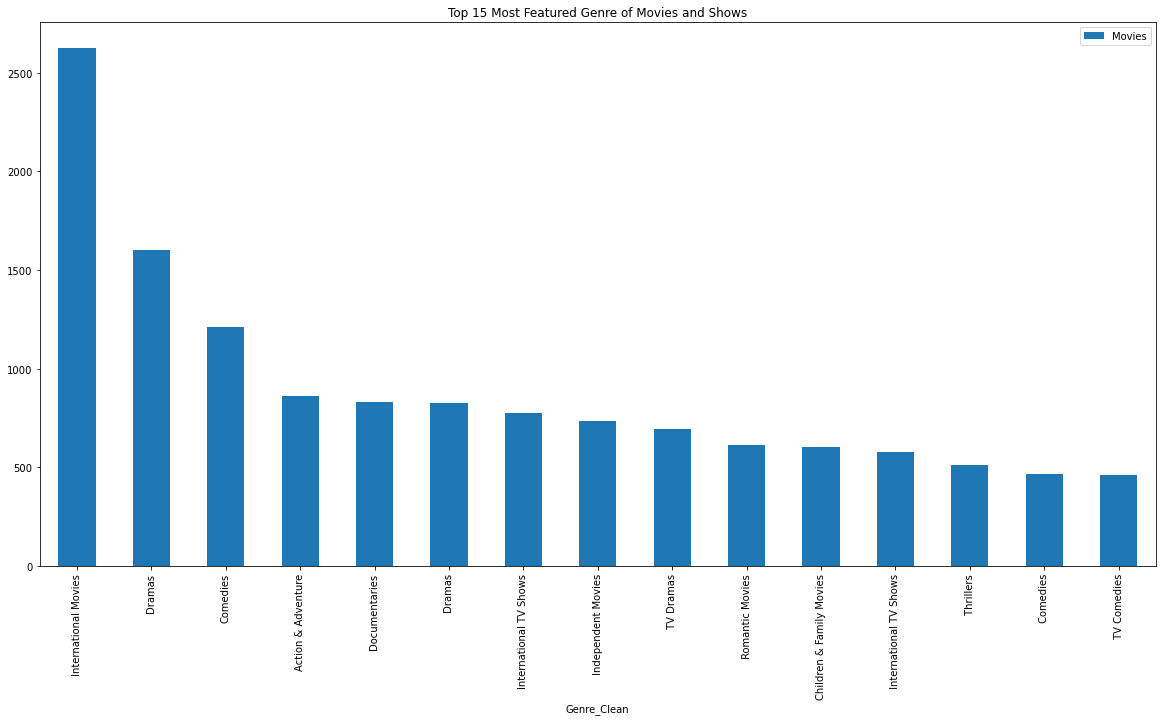

In [59]:
#Visualization
plt.figure()
Genre.nlargest(15,'Movies').plot(kind = 'bar',x='Genre_Clean',y='Movies',figsize=(20,10))
plt.title('Top 15 Most Featured Genre of Movies and Shows')
plt.show()

#### **OBSERVATION**<br>
+ Most films on Netflix are international movies
+ The **most featured** genre of film in Netflix is **Drama**. Most Films seem to possess an element of drama, which can conclude that most people are attracted to movies which have drama.
+ **Comedies** come in at **2nd** place in most popular featured genre.
+ The **3rd** most featured film is **Action & Adventure.**

In [60]:
Genre.nsmallest(15,'Movies')

,Genre_Clean,Movies
55,LGBTQ Movies,1
63,Sports Movies,1
70,TV Sci-Fi & Fantasy,1
62,Spanish-Language TV Shows,2
59,Romantic Movies,3
2,Classic & Cult TV,6
26,Stand-Up Comedy,9
69,TV Horror,11
46,Cult Movies,12
61,Sci-Fi & Fantasy,13


<Figure size 432x288 with 0 Axes>

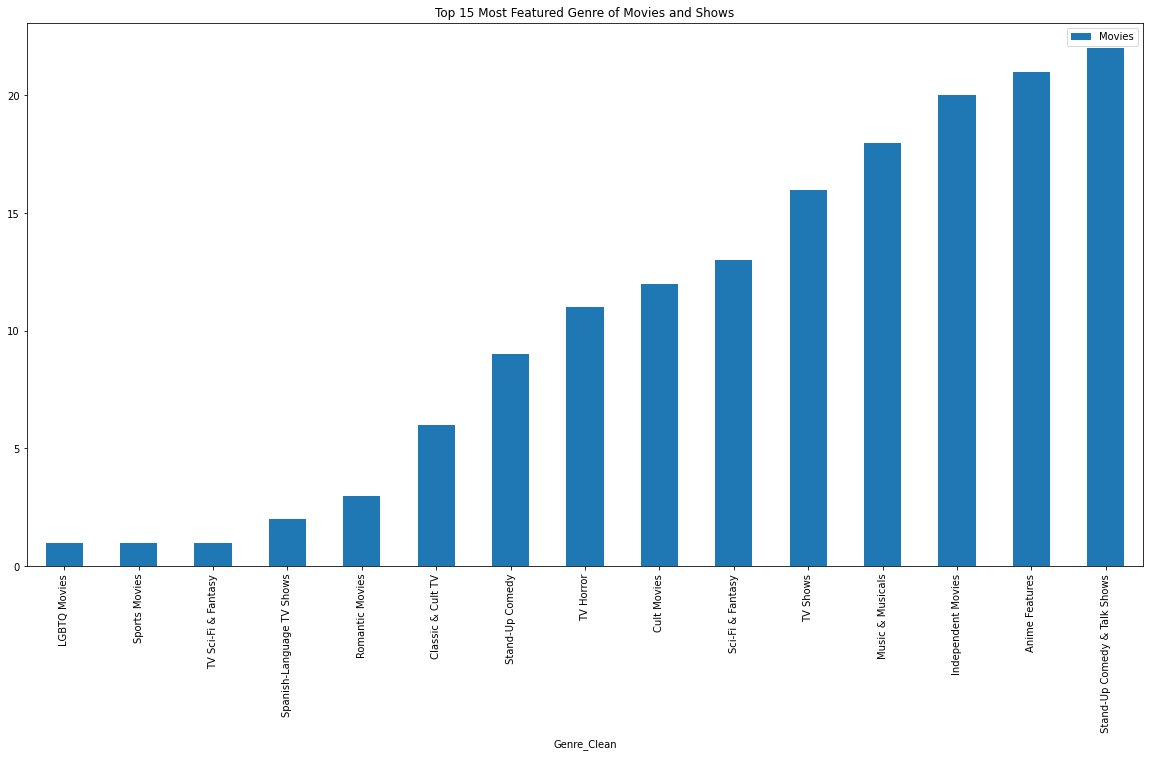

In [61]:
#Visualization
plt.figure()
Genre.nsmallest(15,'Movies').plot(kind = 'bar',x='Genre_Clean',y='Movies',figsize=(20,10))
plt.title('Top 15 Most Featured Genre of Movies and Shows')
plt.show()

#### **OBSERVATION**<br>
+ LGBTQ Movies, Sport Movies, TV Sci-Fi & Fantasy are the least featured genres of movies
+ Classic and Cult Tv & Spanish-Language TV Shows are also noteworthy mentions
+ Sci-Fi and Fantasy movies are also minimal

In [62]:
netfx.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Actor,No Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


### <u>Description Analysis</u><a name="subparagraph6"></a><br>

In [63]:
Desc = netfx[['title','listed_in','description']]

In [64]:
Desc.head(10)

,title,listed_in,description
0,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,My Little Pony: A New Generation,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Sankofa,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,The Great British Baking Show,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,The Starling,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [65]:
pip install -U textblob

In [69]:
#this function gets the  numerical value of the blob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity
#this function automaticlly determines numerical value(positive or negative)
def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'Positive'
    elif blob.polarity <0:
        result = 'Negative'
    else:
        result = 'Neutral'
    return result

In [70]:
#Testing the function
get_sentiment('I love pineaples')

0.5

In [72]:
#Testing the function
get_sentiment_label('I love gear')

'Positive'

In [73]:
get_sentiment_label('This was a limited experience for me')

'Negative'

In [77]:
Desc['Description Sentiment'] = Desc['description'].apply(get_sentiment_label)

C:\Users\USER\AppData\Local\Temp\ipykernel_11844\3653617795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Desc['Description Sentiment'] = Desc['description'].apply(get_sentiment_label)


In [80]:
Desc

,title,listed_in,description,Description Sentiment
0,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm...",Positive
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Neutral
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Negative
3,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Negative
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Neutral
...,...,...,...,...
8802,Zodiac,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Negative
8803,Zombie Dumb,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Positive
8804,Zombieland,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Neutral
8805,Zoom,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Positive


In [81]:
Desc['Description Sentiment'].value_counts()

Positive    4551
Negative    2658
Neutral     1598
Name: Description Sentiment, dtype: int64

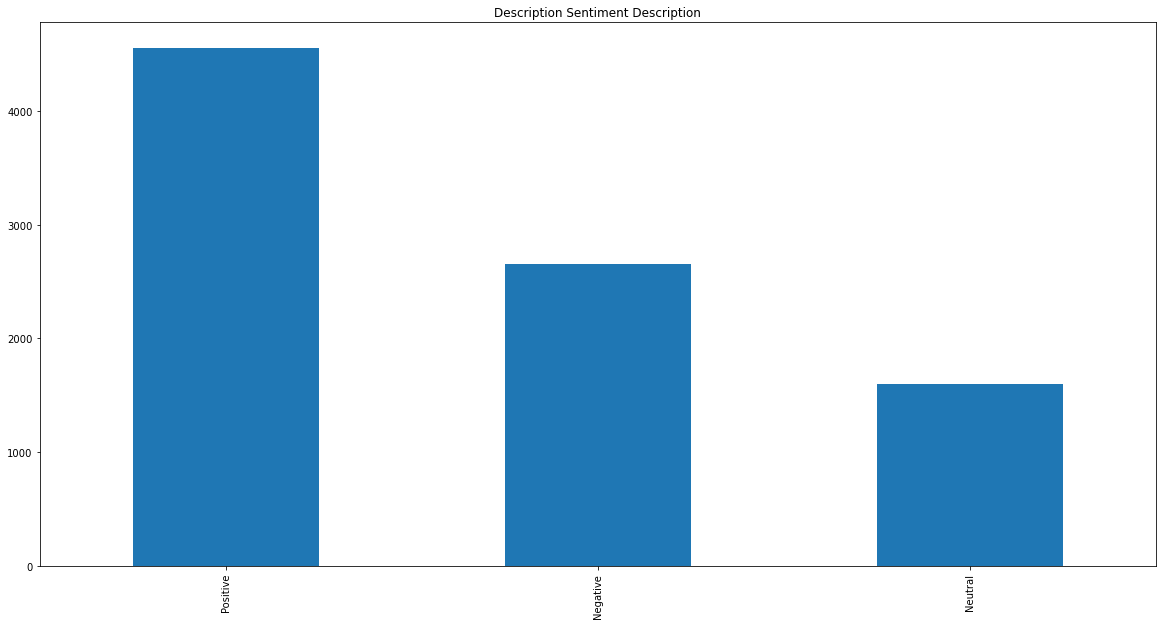

In [88]:
#Visualization
plt.figure()
Desc['Description Sentiment'].value_counts().plot(kind = 'bar',x='Description Sentiment',y='Movies',figsize=(20,10))
plt.title('Description Sentiment Description')
plt.show()

#### **OBSERVATION**<br>
+ Positive descriptions are the majority
+ Negative descriptions is 2nd
+ Neutral descriptions are in the minority.

In [102]:
#Dataframe that contains all records with a positive sentiment description
Good_desc=Desc[(Desc['Description Sentiment']=='Positive')]

In [122]:
Good_desc.head(15)

,title,listed_in,description,Description Sentiment
0,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm...",Positive
8,The Great British Baking Show,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Positive
10,"Vendetta: Truth, Lies and The Mafia","Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",Positive
12,Je Suis Karl,"Dramas, International Movies",After most of her family is murdered in a terr...,Positive
13,Confessions of an Invisible Girl,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,Positive
14,Crime Stories: India Detectives,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...,Positive
17,Falsa identidad,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,Positive
18,Intrusion,Thrillers,After a deadly home invasion at a couple’s new...,Positive
21,Resurrection: Ertugrul,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,Positive
22,Avvai Shanmughi,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,Positive


In [106]:
Good_desc.iloc[0]['description']

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [137]:
Good_desc.iloc[39]['description']

'When his home is threatened by humans, a young dragon summons the courage to seek a mythical paradise where dragons can live in peace and fly free.'

In [120]:
Good_desc.iloc[32]['description']

'In a place called Numberland, math adds up to tons of fun when a group of cheerful blocks work, play and sing together.'

#### **OBSERVATION**<br>
Most descriptions that are positive have very 'optimistic' set of words.
+ Most of them are family friendly. 

In [104]:
#Dataframe that contains all records with a negative sentiment description
Bad_desc = Desc[(Desc['Description Sentiment']=='Negative')]

In [123]:
Bad_desc.head(15)

,title,listed_in,description,Description Sentiment
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Negative
3,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Negative
7,Sankofa,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Negative
15,Dear White People,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,Negative
20,Monsters Inside: The 24 Faces of Billy Milligan,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl...",Negative
28,Dark Skies,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,Negative
29,Paranoia,Thrillers,"Blackmailed by his company's CEO, a low-level ...",Negative
32,Sex Education,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,Negative
34,Tayo and Little Wizards,Kids' TV,Tayo speeds into an adventure when his friends...,Negative
35,The Father Who Moves Mountains,"Dramas, International Movies, Thrillers",When his son goes missing during a snowy hike ...,Negative


In [109]:
Bad_desc.iloc[0]['description']

'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'

In [114]:
Bad_desc.iloc[4]['description']

'In the late 1970s, an accused serial rapist claims multiple personalities control his behavior, setting off a legal odyssey that captivates America.'

In [117]:
Bad_desc.iloc[24]['description']

'Slipped a fatal poison on her final job, a ruthless assassin working in Tokyo has less than 24 hours to find out who ordered the hit and exact revenge.'

In [144]:
Bad_desc.iloc[85]['description']

"A man searching for the truth behind his wife's death becomes caught up in a dangerous web of secrets and intrigue stretching from New York to Tel Aviv."

#### **OBSERVATION**<br>
The descriptions are very graphic and tell a story using strong words. 

In [124]:
Neutral_desc=Desc[(Desc['Description Sentiment']=='Neutral')]

In [126]:
Neutral_desc.head()

,title,listed_in,description,Description Sentiment
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Neutral
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Neutral
5,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Neutral
6,My Little Pony: A New Generation,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Neutral
9,The Starling,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Neutral


In [127]:
Neutral_desc.iloc[24]['description']

'Ranger Gabe Walker and his partner are called to rescue a group of stranded climbers, only to learn the climbers are actually thieving hijackers.'

In [128]:
Neutral_desc.iloc[2]['description']

'The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe.'

In [129]:
Neutral_desc.iloc[125]['description']

"In 1879, Kenshin and his allies face their strongest enemy yet: his former brother-in-law Enishi Yukishiro and his minions, who've vowed their revenge."

#### OBSERVATION<br>
Descriptions use both a mixture of strong and soft words.

### **CONCLUSION**<a name="paragraph4"></a><br>
Netflix Dataset Analysis has been conducted. They following has been covered:<br>
+ Overview of the dataset
+ Analysis of the countries that have contributed to making netflix shows and movies.
+ Analysis of the release years of each and every TV Show and movie.
+ Analysis of the most featured directors with movies and Shows on Netflix
+ Analysis of the most casted actors on Netflix.
+ Analysis of the most popular genre of shows and movies.
+ Sentimental Analysis with regards to movie and show descriptions.<br>
<br>
There is use of bar graphs that help in visualising the data to grant us higher visibility on the insights that the data can provide.